In [55]:
import pandas as pd 
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import DistanceMetric, pairwise_distances
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
full_county_data =  pd.read_csv("county_health_data_2025.csv", skiprows=[0])

In [57]:
full_county_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3210 entries, 0 to 3209
Columns: 226 entries, FIPS to Unnamed: 225
dtypes: float64(217), int64(1), object(8)
memory usage: 5.5+ MB


In [58]:
# getting full list of column names since there are 226
print(list(sorted(full_county_data.columns)))

['# Associations', '# Completed High School', '# Dentists', '# Households with Broadband Access', '# Injury Deaths', '# Mental Health Providers', '# Primary Care Physicians', '# Some College', '# Unemployed', '# Uninsured', '# Workers who Drive Alone', '% Children in Poverty', '% Children in Poverty (AIAN)', '% Children in Poverty (Asian)', '% Children in Poverty (Black)', '% Children in Poverty (Hispanic)', '% Children in Poverty (White)', '% Completed High School', '% Drive Alone (AIAN)', '% Drive Alone (AIAN) 95% CI - High', '% Drive Alone (AIAN) 95% CI - Low', '% Drive Alone (Asian)', '% Drive Alone (Asian) 95% CI - High', '% Drive Alone (Asian) 95% CI - Low', '% Drive Alone (Black)', '% Drive Alone (Black) 95% CI - High', '% Drive Alone (Black) 95% CI - Low', '% Drive Alone (Hispanic)', '% Drive Alone (Hispanic) 95% CI - High', '% Drive Alone (Hispanic) 95% CI - Low', '% Drive Alone (White)', '% Drive Alone (White) 95% CI - High', '% Drive Alone (White) 95% CI - Low', '% Drive Alo

In [59]:
# Selecting Columns I want to study
county_data = full_county_data[["FIPS",
                                "State",
                                "County",
                                "% Children in Poverty",
                                "% Fair or Poor Health",
                                "% Low Birth Weight",
                                "% With Access to Exercise Opportunities",
                                "% Long Commute - Drives Alone",
                                "% Uninsured",
                                "% Completed High School",
                                "% Some College",
                                "% Severe Housing Problems",
                                "% Unemployed",
                                "Average Number of Physically Unhealthy Days",
                                "Average Number of Mentally Unhealthy Days",
                                "Years of Potential Life Lost Rate",
                                "Average Daily PM2.5",
                                "Food Environment Index",
                                "Primary Care Physicians Rate",
                                "Dentist Rate",
                                "Mental Health Provider Rate",
                                "Income Ratio",
                                "Presence of Water Violation",
                               ]].copy()

In [60]:
county_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3210 entries, 0 to 3209
Data columns (total 23 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   FIPS                                         3210 non-null   int64  
 1   State                                        3210 non-null   object 
 2   County                                       3159 non-null   object 
 3   % Children in Poverty                        3194 non-null   float64
 4   % Fair or Poor Health                        3195 non-null   float64
 5   % Low Birth Weight                           3094 non-null   float64
 6   % With Access to Exercise Opportunities      3148 non-null   float64
 7   % Long Commute - Drives Alone                3195 non-null   float64
 8   % Uninsured                                  3194 non-null   float64
 9   % Completed High School                      3195 non-null   float64
 10  

In [61]:
county_data.describe()

,FIPS,% Children in Poverty,% Fair or Poor Health,% Low Birth Weight,% With Access to Exercise Opportunities,% Long Commute - Drives Alone,% Uninsured,% Completed High School,% Some College,% Severe Housing Problems,% Unemployed,Average Number of Physically Unhealthy Days,Average Number of Mentally Unhealthy Days,Years of Potential Life Lost Rate,Average Daily PM2.5,Food Environment Index,Primary Care Physicians Rate,Dentist Rate,Mental Health Provider Rate,Income Ratio
count,3210.000000,3194.000000,3195.000000,3094.000000,3148.000000,3195.000000,3194.000000,3195.000000,3194.000000,3195.000000,3193.000000,3195.000000,3195.000000,2956.000000,3115.000000,3151.000000,3037.000000,3107.000000,3024.000000,3173.000000
mean,30260.285358,18.981215,19.574648,8.414674,62.321792,33.247574,10.446462,88.799687,59.327489,12.856338,3.586314,4.448826,5.634429,10460.520636,7.642472,7.452840,53.880474,48.656582,211.881614,4.561897
std,15228.928422,8.022613,4.787434,2.139114,22.873056,12.709671,4.645711,5.451379,11.693837,4.430040,1.215637,0.664085,0.610058,3813.333654,2.003006,1.202557,36.699540,34.688219,231.528445,0.809201
min,1000.000000,3.000000,9.000000,3.000000,0.000000,0.000000,2.000000,47.000000,17.000000,0.000000,0.300000,2.800000,3.500000,3315.000000,1.300000,0.000000,0.000000,0.000000,0.000000,2.300000
25%,18151.500000,13.000000,16.000000,7.000000,48.000000,24.000000,7.000000,86.000000,52.000000,10.000000,2.800000,3.900000,5.200000,7826.250000,6.500000,6.800000,30.000000,28.000000,66.000000,4.000000
50%,29162.000000,18.000000,19.000000,8.000000,65.000000,33.000000,9.000000,90.000000,59.000000,12.000000,3.400000,4.400000,5.600000,9874.000000,7.600000,7.600000,47.000000,44.000000,148.000000,4.400000
75%,45070.500000,23.000000,23.000000,9.000000,80.000000,42.000000,13.000000,93.000000,68.000000,15.000000,4.100000,4.900000,6.000000,12435.500000,8.500000,8.300000,72.000000,65.000000,276.250000,5.000000
max,56045.000000,63.000000,47.000000,23.000000,100.000000,75.000000,38.000000,100.000000,93.000000,61.000000,17.300000,7.500000,8.200000,46418.000000,39.100000,10.000000,581.000000,816.000000,3713.000000,10.500000


In [62]:
county_data = county_data.dropna(subset=["County"])

In [63]:
county_data.head()

,FIPS,State,County,% Children in Poverty,% Fair or Poor Health,% Low Birth Weight,% With Access to Exercise Opportunities,% Long Commute - Drives Alone,% Uninsured,% Completed High School,...,Average Number of Physically Unhealthy Days,Average Number of Mentally Unhealthy Days,Years of Potential Life Lost Rate,Average Daily PM2.5,Food Environment Index,Primary Care Physicians Rate,Dentist Rate,Mental Health Provider Rate,Income Ratio,Presence of Water Violation
1,1001,Alabama,Autauga,17.0,18.0,10.0,54.0,42.0,8.0,90.0,...,4.3,5.8,9938.0,9.3,6.8,44.0,30.0,36.0,4.3,No
2,1003,Alabama,Baldwin,14.0,17.0,8.0,62.0,38.0,10.0,92.0,...,3.9,6.0,8957.0,7.8,7.4,63.0,47.0,121.0,4.4,No
3,1005,Alabama,Barbour,35.0,28.0,12.0,55.0,38.0,12.0,78.0,...,5.4,6.3,12739.0,8.8,6.2,40.0,32.0,28.0,5.6,No
4,1007,Alabama,Bibb,21.0,25.0,10.0,43.0,54.0,11.0,80.0,...,5.1,6.6,11709.0,8.6,7.3,67.0,23.0,37.0,5.3,Yes
5,1009,Alabama,Blount,17.0,23.0,8.0,42.0,61.0,13.0,83.0,...,4.8,6.4,11898.0,8.8,7.4,20.0,17.0,28.0,4.6,No


In [64]:
county_data = county_data.fillna(county_data.median(numeric_only=True))

In [65]:
county_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3159 entries, 1 to 3209
Data columns (total 23 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   FIPS                                         3159 non-null   int64  
 1   State                                        3159 non-null   object 
 2   County                                       3159 non-null   object 
 3   % Children in Poverty                        3159 non-null   float64
 4   % Fair or Poor Health                        3159 non-null   float64
 5   % Low Birth Weight                           3159 non-null   float64
 6   % With Access to Exercise Opportunities      3159 non-null   float64
 7   % Long Commute - Drives Alone                3159 non-null   float64
 8   % Uninsured                                  3159 non-null   float64
 9   % Completed High School                      3159 non-null   float64
 10  % Som

In [66]:
county_data["FIPS"].duplicated().sum()

np.int64(0)

In [67]:
county_data["Presence of Water Violation"].head(5)

1     No
2     No
3     No
4    Yes
5     No
Name: Presence of Water Violation, dtype: object

In [68]:
county_data["Presence of Water Violation"] = county_data["Presence of Water Violation"].fillna("No")

In [69]:
county_data["Presence of Water Violation"].unique()

array(['No', 'Yes'], dtype=object)

In [70]:
county_data["Presence of Water Violation"] = county_data["Presence of Water Violation"].map({
    "Yes": 1,
    "No": 0
})

In [71]:
county_data["State_and_County"] = county_data["State"] + ": " + county_data["County"]
county_data.set_index("State_and_County", inplace = True)

In [72]:
county_data.drop(columns=["State", "County"], inplace = True)

In [73]:
county_data.head()

,FIPS,% Children in Poverty,% Fair or Poor Health,% Low Birth Weight,% With Access to Exercise Opportunities,% Long Commute - Drives Alone,% Uninsured,% Completed High School,% Some College,% Severe Housing Problems,...,Average Number of Physically Unhealthy Days,Average Number of Mentally Unhealthy Days,Years of Potential Life Lost Rate,Average Daily PM2.5,Food Environment Index,Primary Care Physicians Rate,Dentist Rate,Mental Health Provider Rate,Income Ratio,Presence of Water Violation
State_and_County,,,,,,,,,,,,,,,,,,,,,
Alabama: Autauga,1001,17.0,18.0,10.0,54.0,42.0,8.0,90.0,61.0,14.0,...,4.3,5.8,9938.0,9.3,6.8,44.0,30.0,36.0,4.3,0
Alabama: Baldwin,1003,14.0,17.0,8.0,62.0,38.0,10.0,92.0,65.0,12.0,...,3.9,6.0,8957.0,7.8,7.4,63.0,47.0,121.0,4.4,0
Alabama: Barbour,1005,35.0,28.0,12.0,55.0,38.0,12.0,78.0,44.0,14.0,...,5.4,6.3,12739.0,8.8,6.2,40.0,32.0,28.0,5.6,0
Alabama: Bibb,1007,21.0,25.0,10.0,43.0,54.0,11.0,80.0,44.0,12.0,...,5.1,6.6,11709.0,8.6,7.3,67.0,23.0,37.0,5.3,1
Alabama: Blount,1009,17.0,23.0,8.0,42.0,61.0,13.0,83.0,53.0,10.0,...,4.8,6.4,11898.0,8.8,7.4,20.0,17.0,28.0,4.6,0


In [74]:
health_profile = county_data.drop(columns=["FIPS"])
scaler = StandardScaler()
health_profile_scaled = scaler.fit_transform(health_profile)

In [75]:
county_data_scaled = pd.DataFrame(health_profile_scaled, index= county_data.index, columns=health_profile.columns)

In [76]:
county_data_scaled.head()

,% Children in Poverty,% Fair or Poor Health,% Low Birth Weight,% With Access to Exercise Opportunities,% Long Commute - Drives Alone,% Uninsured,% Completed High School,% Some College,% Severe Housing Problems,% Unemployed,Average Number of Physically Unhealthy Days,Average Number of Mentally Unhealthy Days,Years of Potential Life Lost Rate,Average Daily PM2.5,Food Environment Index,Primary Care Physicians Rate,Dentist Rate,Mental Health Provider Rate,Income Ratio,Presence of Water Violation
State_and_County,,,,,,,,,,,,,,,,,,,,
Alabama: Autauga,-0.253242,-0.338100,0.757210,-0.355278,0.686601,-0.530795,0.224776,0.155196,0.268272,-1.140755,-0.237280,0.261413,-0.137970,0.835807,-0.551867,-0.254546,-0.528677,-0.752346,-0.319167,-0.754519
Alabama: Baldwin,-0.626546,-0.546991,-0.189377,-0.002388,0.372576,-0.100520,0.590601,0.497439,-0.183954,-1.058646,-0.841525,0.591141,-0.404795,0.077067,-0.046988,0.275686,-0.031870,-0.375136,-0.195486,-0.754519
Alabama: Barbour,1.986583,1.750808,1.703798,-0.311167,0.372576,0.329755,-1.970177,-1.299339,0.268272,0.665624,1.424396,1.085733,0.623882,0.582894,-1.056745,-0.366174,-0.470229,-0.787848,1.288686,-0.754519
Alabama: Bibb,0.244497,1.124136,0.757210,-0.840502,1.628677,0.114617,-1.604351,-1.299339,-0.183954,-0.894430,0.971212,1.580325,0.343730,0.481728,-0.131134,0.387314,-0.733244,-0.747908,0.917643,1.325347
Alabama: Blount,-0.253242,0.706354,-0.189377,-0.884614,2.178221,0.544892,-1.055613,-0.529291,-0.636180,-1.222863,0.518027,1.250597,0.395136,0.582894,-0.046988,-0.924312,-0.908588,-0.787848,0.051876,-0.754519


# Analysis Part 1: Cosine Section

In [77]:
def calculating_cosine(county_of_interest):
    """
    Calculates Cosine Distance with a county input
    """
    cosine_distances = pairwise_distances(county_data_scaled, county_data_scaled.loc
                                          [[county_of_interest]], metric="cosine")[:,0]

    cosine_pairs = [(county,distance) for county, distance in zip(county_data_scaled.index, cosine_distances) 
                    if county != county_of_interest]

    top_counties = sorted(cosine_pairs, key=lambda x: x[1])[:10]
    print(f"Top 10 Counties most similar to {county_of_interest} using Cosine Distance")

    for county, distance in top_counties:
        print(f"{county} = {distance}")

In [78]:
calculating_cosine('California: Fresno')

Top 10 Counties most similar to California: Fresno using Cosine Distance
California: Sutter = 0.04453119059670474
California: Kern = 0.050356389113811684
California: Tulare = 0.0693361202007653
California: Kings = 0.08683399289327476
California: Glenn = 0.09728393845036853
California: Yuba = 0.10015514141626758
Oregon: Klamath = 0.10636444558118185
California: Tehama = 0.10966634703544109
California: Stanislaus = 0.1105337383507431
California: Madera = 0.11248914415693856


In [79]:
calculating_cosine("Louisiana: Franklin")

Top 10 Counties most similar to Louisiana: Franklin using Cosine Distance
Louisiana: St. Landry = 0.05977351533214703
Louisiana: Avoyelles = 0.07374927595763292
Alabama: Monroe = 0.07427500865617942
Louisiana: Morehouse = 0.07848753460368374
Arkansas: Desha = 0.080821150843991
Arkansas: Phillips = 0.08585265179414692
Louisiana: Webster = 0.08755386360628736
Alabama: Wilcox = 0.08954751010971074
Arkansas: Lee = 0.09039910949758678
Louisiana: Claiborne = 0.09248546590723428


In [80]:
calculating_cosine("North Carolina: Robeson")

Top 10 Counties most similar to North Carolina: Robeson using Cosine Distance
North Carolina: Richmond = 0.09115662533832114
Mississippi: Sharkey = 0.09268070476051116
North Carolina: Scotland = 0.1027408932502415
Alabama: Wilcox = 0.11006131739960079
Mississippi: Washington = 0.11790631555259767
Louisiana: Franklin = 0.12397630828442685
Arkansas: Chicot = 0.12468572540810463
Arkansas: Lee = 0.12489316922032279
Arkansas: Phillips = 0.12628139492105672
Texas: Jim Wells = 0.13033549930411015


# Analysis Part 2: Clustering Section

In [81]:
inertia_scores = []
k = range(1,10)

In [82]:
for cluster in k:
    kmeans = KMeans(n_clusters=cluster, n_init=10, random_state=42)
    kmeans.fit(county_data_scaled)
    inertia_scores.append(kmeans.inertia_)

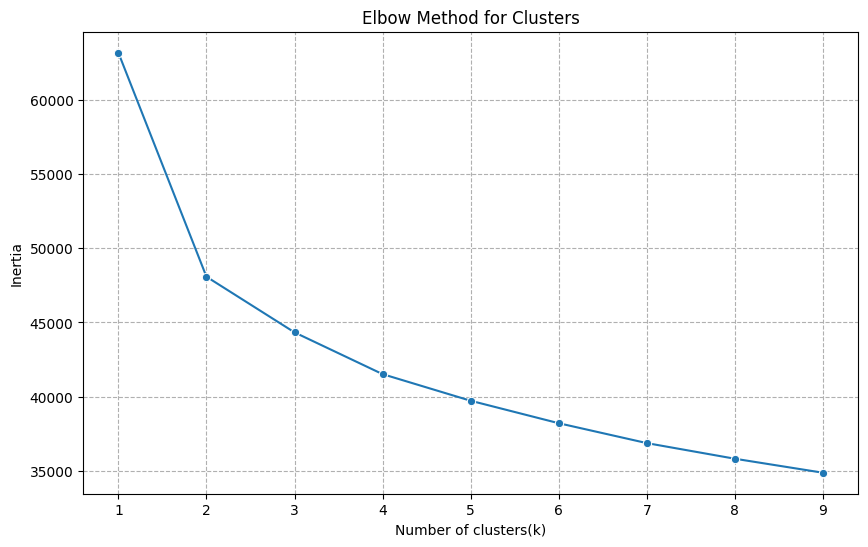

In [83]:
elbow_fig, elbow_ax = plt.subplots(figsize=(10,6))

sns.lineplot(
    x=k,
    y=inertia_scores,
    ax=elbow_ax,
    marker="o",
)

elbow_ax.set_xlabel("Number of clusters(k)")
elbow_ax.set_ylabel("Inertia")
elbow_ax.set_title("Elbow Method for Clusters")
elbow_ax.grid(True, linestyle="--")

In [84]:
best_k = 4
kmeans = KMeans(n_clusters=best_k, n_init=10, random_state=42)
clusters = kmeans.fit_predict(county_data_scaled)
cluster_df = pd.DataFrame({"cluster": clusters},index = county_data_scaled.index)

In [85]:
combined_df = county_data_scaled.join(cluster_df)

In [86]:
print("Counties by Cluster:")
print(combined_df["cluster"].value_counts().sort_index())

Counties by Cluster:
cluster
0     471
1     704
2    1104
3     880
Name: count, dtype: int64


In [87]:
pca = PCA(n_components=2)
scaled_pca = pca.fit_transform(county_data_scaled)
combined_df["PCA1"] = scaled_pca[:,0]
combined_df["PCA2"] = scaled_pca[:,1]

In [88]:
loadings = pd.DataFrame(pca.components_.T, index=county_data_scaled.columns,
                        columns=["PCA1","PCA2"])
abs_loadings = loadings["PCA1"].abs().sort_values(ascending=False)
print("Factors Strongly Influencing PCA1\n")
print(abs_loadings.head(5))

Factors Strongly Influencing PCA1

% Fair or Poor Health                          0.349129
Average Number of Physically Unhealthy Days    0.338840
% Children in Poverty                          0.328247
% Some College                                 0.299532
% Completed High School                        0.297274
Name: PCA1, dtype: float64


In [89]:
abs_loadings2 = loadings["PCA2"].abs().sort_values(ascending=False)
print("Factors Strongly Influencing PCA2\n")
print(abs_loadings2.head(5))

Factors Strongly Influencing PCA2

Mental Health Provider Rate                0.437334
% Severe Housing Problems                  0.407429
Dentist Rate                               0.402273
Primary Care Physicians Rate               0.375858
% With Access to Exercise Opportunities    0.313059
Name: PCA2, dtype: float64


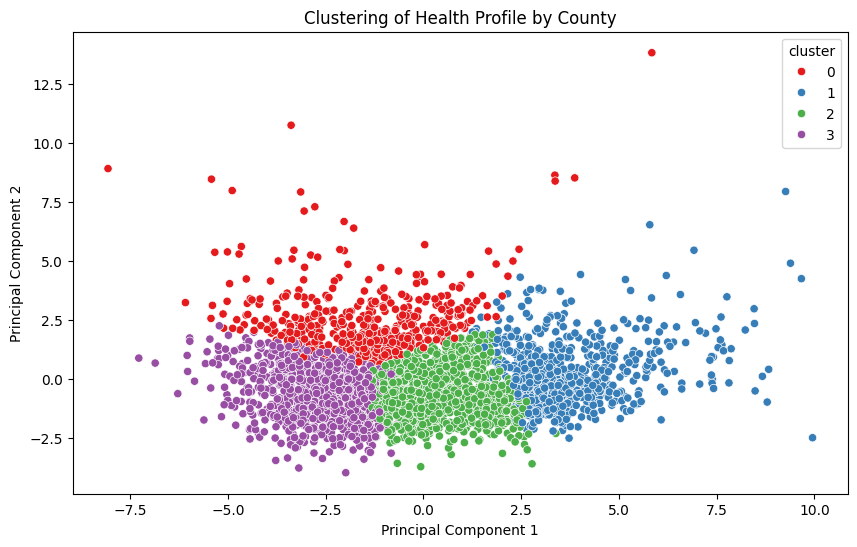

In [90]:
pca_fig, pca_ax = plt.subplots(figsize=(10,6))

plot = sns.scatterplot(
    data=combined_df,
    x = "PCA1",
    y = "PCA2",
    ax = pca_ax,
    hue = combined_df["cluster"],
    palette = "Set1"
)

pca_ax.set_xlabel("Principal Component 1")
pca_ax.set_ylabel("Principal Component 2")
pca_ax.set_title("Clustering of Health Profile by County")

plt.show()

In [91]:
county_data_scaled["cluster"] = combined_df["cluster"]

In [92]:
for cluster, subset in combined_df.groupby("cluster"):
    size = len(subset)
    print(f"\nCluster {cluster}: Size - {size}")

    take = min(5, size)
    state_in_cluster = np.random.choice(subset.index, size=take,replace=False)

    for state in state_in_cluster:
        print(" ", state)


Cluster 0: Size - 471
  Washington: Whatcom
  Illinois: Jackson
  Virginia: Winchester City
  Minnesota: Beltrami
  New Jersey: Atlantic

Cluster 1: Size - 704
  Kentucky: Estill
  Kentucky: Breathitt
  New Mexico: Socorro
  Kentucky: Wolfe
  Alabama: Macon

Cluster 2: Size - 1104
  Iowa: Crawford
  Texas: Bandera
  Vermont: Essex
  Louisiana: West Feliciana
  Tennessee: Sumner

Cluster 3: Size - 880
  Indiana: Boone
  Indiana: Hancock
  South Dakota: Miner
  Indiana: Floyd
  Nebraska: Thayer


In [93]:
for col in county_data_scaled.columns:
    print(col)

% Children in Poverty
% Fair or Poor Health
% Low Birth Weight
% With Access to Exercise Opportunities
% Long Commute - Drives Alone
% Uninsured
% Completed High School
% Some College
% Severe Housing Problems
% Unemployed
Average Number of Physically Unhealthy Days
Average Number of Mentally Unhealthy Days
Years of Potential Life Lost Rate
Average Daily PM2.5
Food Environment Index
Primary Care Physicians Rate
Dentist Rate
Mental Health Provider Rate
Income Ratio
Presence of Water Violation
cluster


In [94]:
data_df = {}
for cluster_id in combined_df["cluster"].unique():
    cluster_data = []
    for col in county_data_scaled.columns[:-1]:
        cluster_counties = combined_df[combined_df["cluster"] == cluster_id]
        cluster_avg = cluster_counties[col].mean()

        cluster_data.append(cluster_avg)

    data_df[cluster_id] = cluster_data


cluster_mean_df = pd.DataFrame(data_df, index=county_data_scaled.columns[:-1])


In [95]:
cluster_mean_df.head(20)

,2,3,1,0
% Children in Poverty,-0.034579,-0.847417,1.324286,-0.315063
% Fair or Poor Health,0.081384,-0.939374,1.344895,-0.445872
% Low Birth Weight,-0.091203,-0.605123,0.936712,-0.055730
% With Access to Exercise Opportunities,-0.212995,0.211652,-0.587740,0.982296
% Long Commute - Drives Alone,0.230710,-0.230496,0.255262,-0.491661
% Uninsured,0.187694,-0.539840,0.636570,-0.382802
% Completed High School,-0.101949,0.797833,-1.132000,0.440310
% Some College,-0.341429,0.815084,-0.996837,0.767383
% Severe Housing Problems,-0.227989,-0.490491,0.350816,0.926448
% Unemployed,0.060969,-0.680576,0.660143,0.141945


In [96]:
def cluster_tables(df):
    cluster_results = {}

    for cluster in df.columns:
        rows = []

        for index, row_val in df[cluster].items():
            absolute_value = abs(row_val)

            if row_val < 0:
                label = f"{index} (neg)"
            else:
                label = index

            rows.append({
            "Label": label,
            "Value": absolute_value
            })

        new_df = pd.DataFrame(rows).sort_values(by="Value",ascending = False).reset_index(drop=True)

        cluster_results[cluster] = new_df

    return cluster_results

table = cluster_tables(cluster_mean_df.head())

for num in range(0,4):
    print(f"Cluster {num} Info")
    
    print(f"{table[num]}\n")
    

Cluster 0 Info
                                     Label     Value
0  % With Access to Exercise Opportunities  0.982296
1      % Long Commute - Drives Alone (neg)  0.491661
2              % Fair or Poor Health (neg)  0.445872
3              % Children in Poverty (neg)  0.315063
4                 % Low Birth Weight (neg)  0.055730

Cluster 1 Info
                                           Label     Value
0                          % Fair or Poor Health  1.344895
1                          % Children in Poverty  1.324286
2                             % Low Birth Weight  0.936712
3  % With Access to Exercise Opportunities (neg)  0.587740
4                  % Long Commute - Drives Alone  0.255262

Cluster 2 Info
                                           Label     Value
0                  % Long Commute - Drives Alone  0.230710
1  % With Access to Exercise Opportunities (neg)  0.212995
2                       % Low Birth Weight (neg)  0.091203
3                          % Fair or Poor Hea

# Analysis Part 3: Probability Section

In [97]:
health_cat = {
    "Quality of Life": [
        "% Fair or Poor Health",
        "% Low Birth Weight",
        "Average Number of Physically Unhealthy Days",
        "Average Number of Mentally Unhealthy Days",
    ],

    "Health Behaviors": [
        "% With Access to Exercise Opportunities",
        "Food Environment Index",
    ],

    "Clinical Care":[
        "Primary Care Physicians Rate",
        "Dentist Rate",
        "Mental Health Provider Rate",
    ],

    "Social and Economic Factors": [
        "% Completed High School",
        "% Some College",
        "% Severe Housing Problems",
        "% Unemployed",
        "% Children in Poverty",
        "% Severe Housing Problems",
        "Income Ratio",
    ],

    "Physical Environment": [
        "Average Daily PM2.5",
        "Presence of Water Violation",
        "% Long Commute - Drives Alone",
    ]
}


In [98]:
def cluster_by_cat(county_df, cluster_df, county_name,category,list_of_categories):
    cluster_scores = {}
    
    analyzed_cat = list_of_categories[category]
    county_values = county_df.loc[county_name, analyzed_cat]
    
    for cluster in cluster_df.columns:
        cluster_values = cluster_df.loc[analyzed_cat,cluster]
        difference = (county_values - cluster_values).abs().sum()
        score = 1 / (1 + difference)
        cluster_scores[cluster] = score

    total_score = sum(cluster_scores.values())
    probs = {cid: score / total_score for cid,score in cluster_scores.items()}


    return pd.Series(probs)
    

Text(0.5, 1.0, 'Probability of California: Fresno Belonging to Cluster Based on Health Categories')

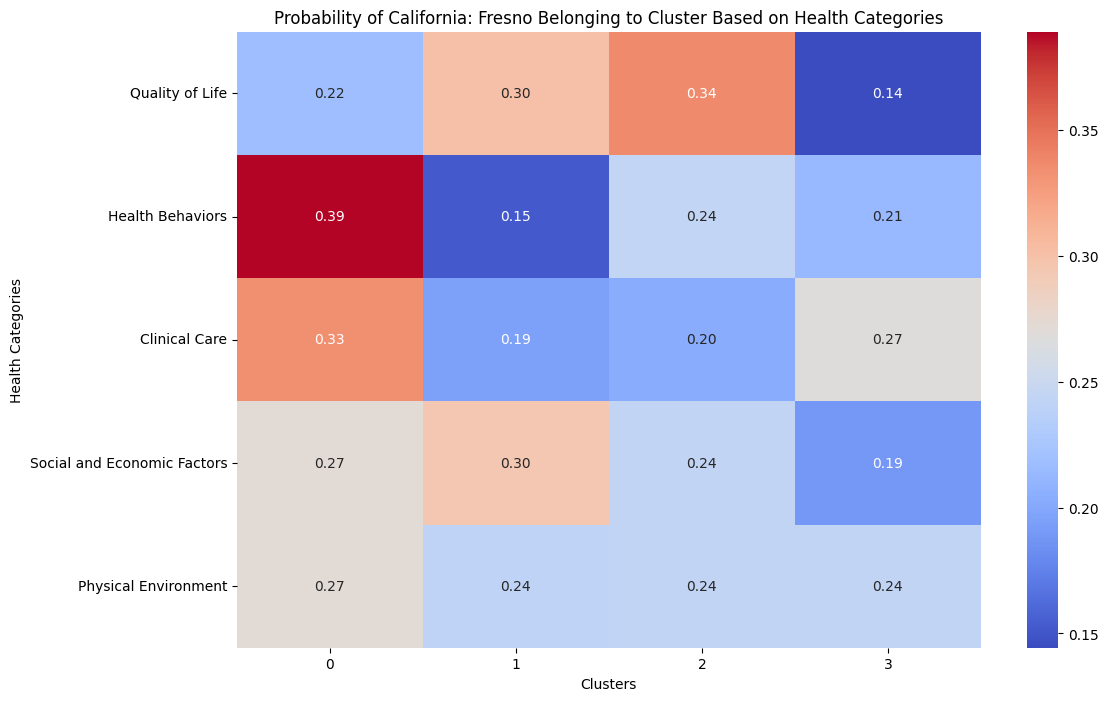

In [99]:
county = "California: Fresno"

probability_data = {}

for keys in health_cat.keys():
    probs = cluster_by_cat(county_df=county_data_scaled, 
               cluster_df = cluster_mean_df,
               county_name=county,category=keys,
               list_of_categories=health_cat
              )
    probability_data[keys] = probs

probability_df = pd.DataFrame(probability_data).T
probability_df = probability_df[sorted(probability_df.columns)]
heatmap_fig, heatmap_ax = plt.subplots(figsize=(12,8))

sns.heatmap(
    probability_df,
    annot = True,
    fmt=".2f",
    cmap="coolwarm",
    ax=heatmap_ax
)

heatmap_ax.set_xlabel("Clusters")
heatmap_ax.set_ylabel("Health Categories")
heatmap_ax.set_title(f"Probability of {county} Belonging to Cluster Based on Health Categories")

Text(0.5, 1.0, 'Probability of Louisiana: Franklin Belonging to Cluster Based on Health Categories')

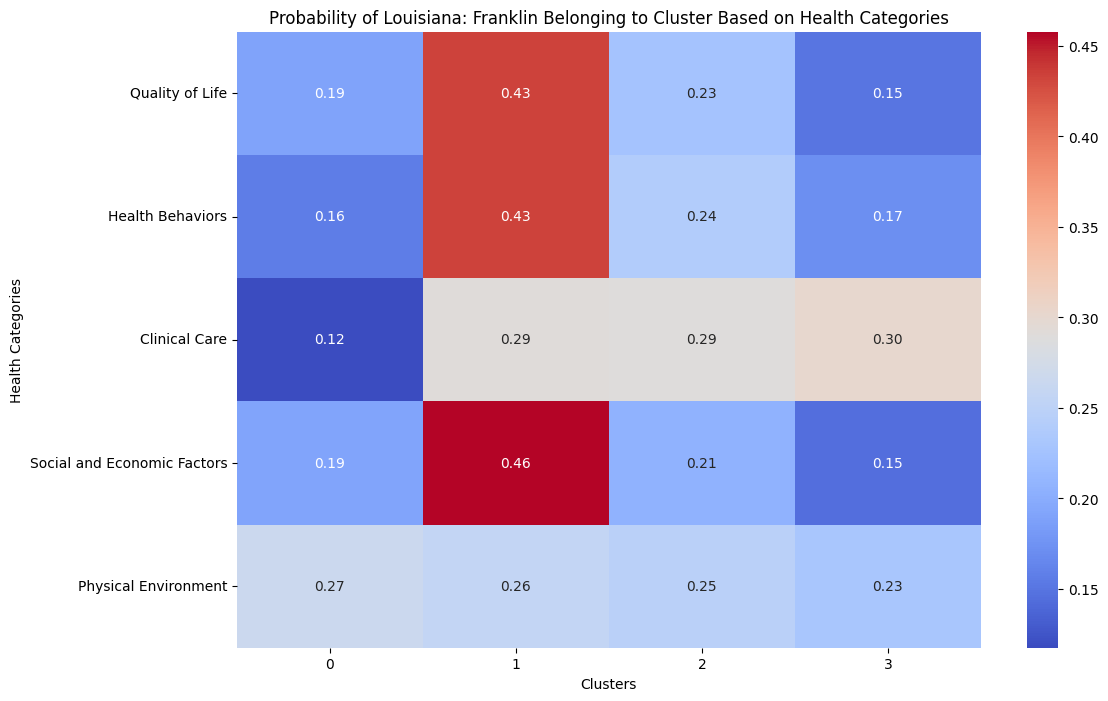

In [100]:
county = "Louisiana: Franklin"

probability_data = {}

for keys in health_cat.keys():
    probs = cluster_by_cat(county_df=county_data_scaled, 
               cluster_df = cluster_mean_df,
               county_name=county,category=keys,
               list_of_categories=health_cat
              )
    probability_data[keys] = probs

probability_df = pd.DataFrame(probability_data).T
probability_df = probability_df[sorted(probability_df.columns)]

heatmap_fig, heatmap_ax = plt.subplots(figsize=(12,8))

sns.heatmap(
    probability_df,
    annot = True,
    fmt=".2f",
    cmap="coolwarm",
    ax=heatmap_ax
)

heatmap_ax.set_xlabel("Clusters")
heatmap_ax.set_ylabel("Health Categories")
heatmap_ax.set_title(f"Probability of {county} Belonging to Cluster Based on Health Categories")

Text(0.5, 1.0, 'Probability of North Carolina: Robeson Belonging to Cluster Based on Health Categories')

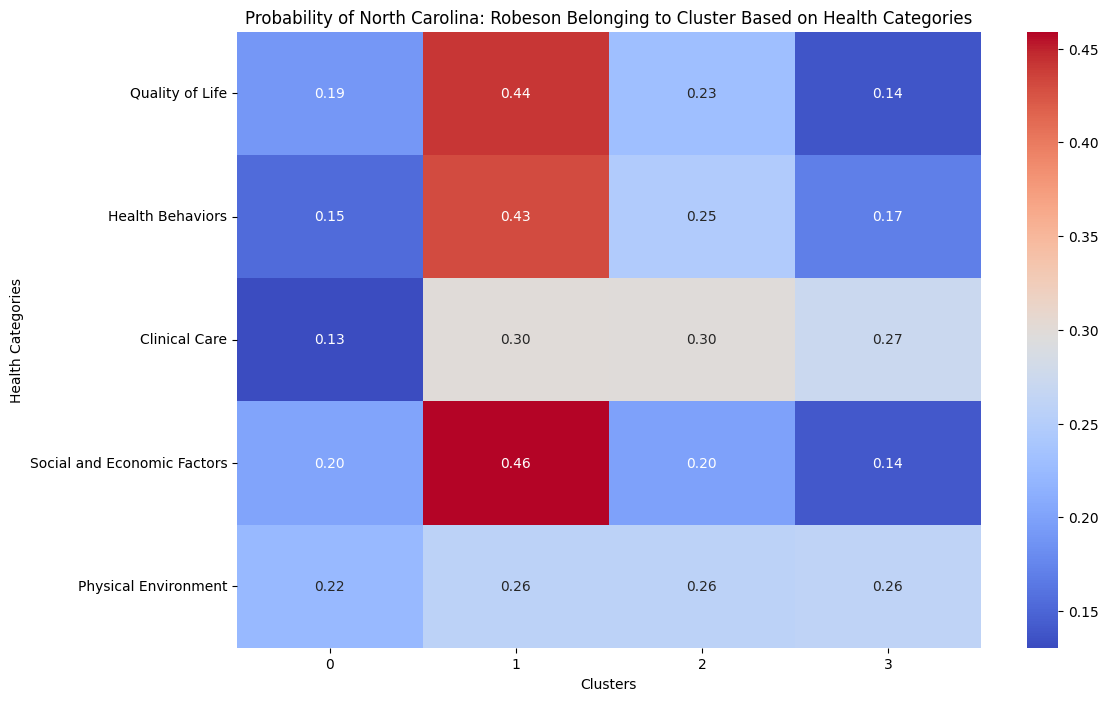

In [101]:
county = "North Carolina: Robeson"

probability_data = {}

for keys in health_cat.keys():
    probs = cluster_by_cat(county_df=county_data_scaled, 
               cluster_df = cluster_mean_df,
               county_name=county,category=keys,
               list_of_categories=health_cat
              )
    probability_data[keys] = probs

probability_df = pd.DataFrame(probability_data).T
probability_df = probability_df[sorted(probability_df.columns)]

heatmap_fig, heatmap_ax = plt.subplots(figsize=(12,8))

sns.heatmap(
    probability_df,
    annot = True,
    fmt=".2f",
    cmap="coolwarm",
    ax=heatmap_ax
)

heatmap_ax.set_xlabel("Clusters")
heatmap_ax.set_ylabel("Health Categories")
heatmap_ax.set_title(f"Probability of {county} Belonging to Cluster Based on Health Categories")

In [102]:
counties = ["Louisiana: Franklin","California: Fresno","North Carolina: Robeson"]
for county in counties:
    cluster_id = county_data_scaled.loc[county, "cluster"]
    print(f"{county} is in Cluster {cluster_id}")

Louisiana: Franklin is in Cluster 1
California: Fresno is in Cluster 0
North Carolina: Robeson is in Cluster 1
